# Make post SCVI objects - no doublet objects
- calculate UMAP from scvi neighbours
- previously annotated individual compartments, removed doublets and batch corrected with SCVI using the same parameters as before (eg. noCC genes for compartments except epithelial, noIgVar for B cells etc)

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sc.logging.print_header()

scanpy==1.7.1 anndata==0.8.0 umap==0.4.6 numpy==1.20.1 scipy==1.6.1 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


scvi with doublets

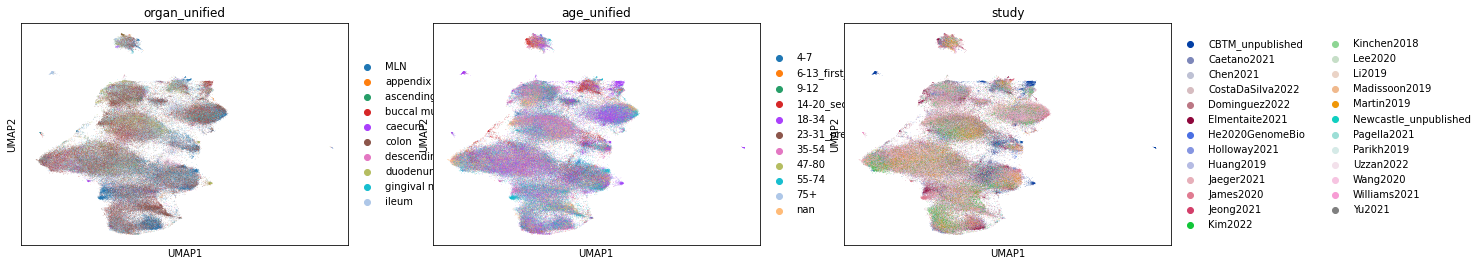

In [2]:
T = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/T.raw.annotv3.nodoublets.22021206.h5ad')
Tscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/T.hvg5000_noCC.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
T.obsm["X_scvi"] = Tscvi
sc.pp.neighbors(
            T,
            use_rep="X_scvi",
            n_pcs=T.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(T, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(T, color=['organ_unified', 'age_unified','study'])

In [3]:
t_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/T_annot_v3.csv',index_col=0)

In [4]:
T.obs['annot_v3'] = t_annot.annot_v3

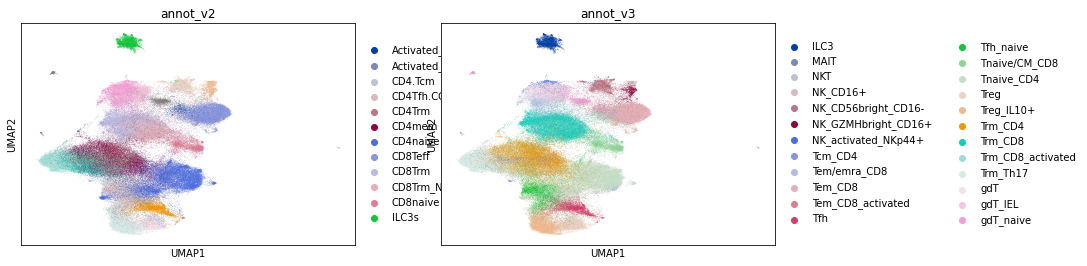

In [5]:
sc.pl.umap(T,color=['annot_v2','annot_v3'])

In [6]:
T.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/T.hvg5000_noCC.scvi_output.annotv3.nodoublets.22021208.h5ad')

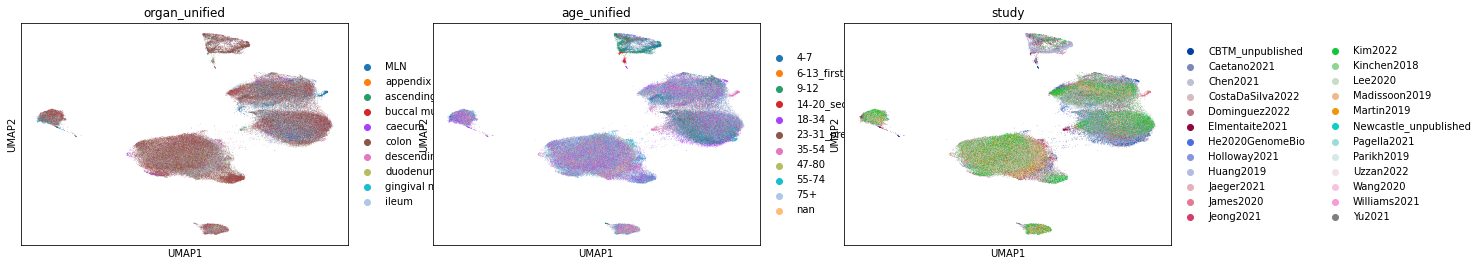

In [2]:
B = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/B.raw.annotv3.nodoublets.22021206.h5ad')
Bscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/B.hvg5000_noCCnoIgVar.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
B.obsm["X_scvi"] = Bscvi
sc.pp.neighbors(
            B,
            use_rep="X_scvi",
            n_pcs=B.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(B, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(B, color=['organ_unified', 'age_unified','study'])

In [3]:
b_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/B_annot_v3.csv',index_col=0)
B.obs['annot_v3'] = b_annot.annot_v3

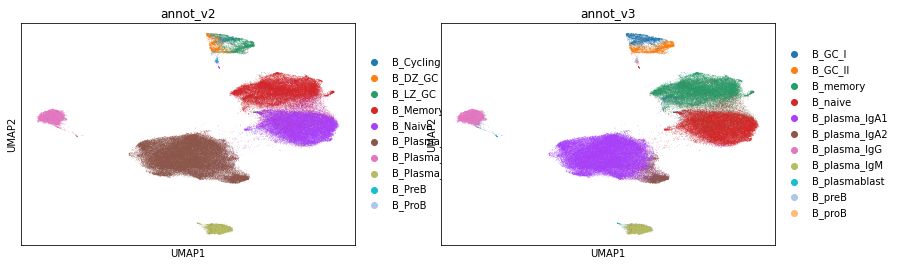

In [4]:
sc.pl.umap(B,color=['annot_v2','annot_v3'])

In [5]:
B.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/B.hvg5000_noCC_noIgVar.scvi_output.annotv3.nodoublets.22021208.h5ad')

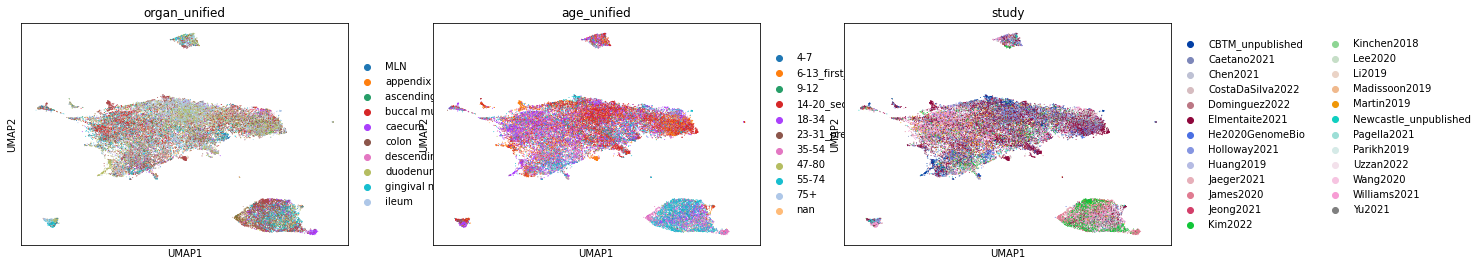

In [3]:
myeloid = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/Myeloid.raw.annotv3.nodoublets.22021206.h5ad')
myeloidscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/Myeloid.hvg5000_noCC.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
myeloid.obsm["X_scvi"] = myeloidscvi
sc.pp.neighbors(
            myeloid,
            use_rep="X_scvi",
            n_pcs=myeloid.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(myeloid, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(myeloid, color=['organ_unified', 'age_unified','study'])

In [4]:
mye_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Myeloid_annot_v3.csv',index_col=0)
myeloid.obs['annot_v3'] = mye_annot.annot_v3

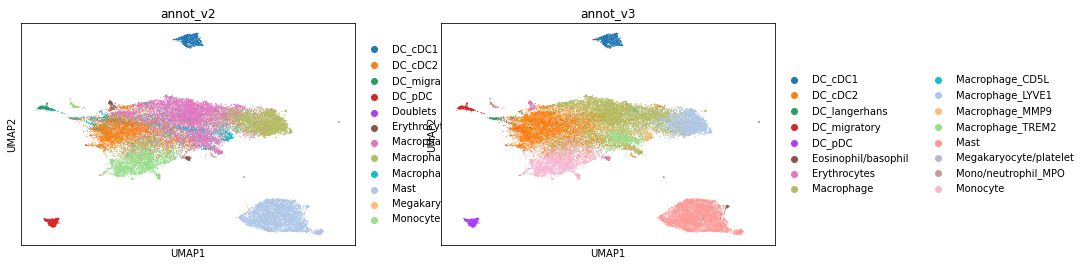

In [5]:
sc.pl.umap(myeloid,color=['annot_v2','annot_v3'])

In [6]:
myeloid.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/Myeloid.hvg5000_noCC.scvi_output.annotv3.nodoublets.22021208.h5ad')

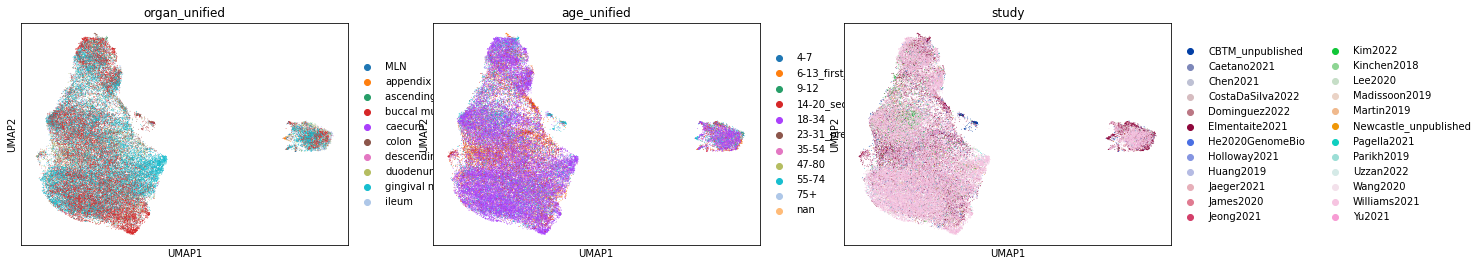

In [13]:
endo = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/Endo.raw.annotv3.nodoublets.22021206.h5ad')
endoscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/Endo.hvg5000_noCC.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
endo.obsm["X_scvi"] = endoscvi
sc.pp.neighbors(
            endo,
            use_rep="X_scvi",
            n_pcs=endo.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(endo, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(endo, color=['organ_unified', 'age_unified','study'])

In [14]:
endo_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Endo_annot_v3.csv',index_col=0)
endo.obs['annot_v3'] = endo_annot.annot_v3

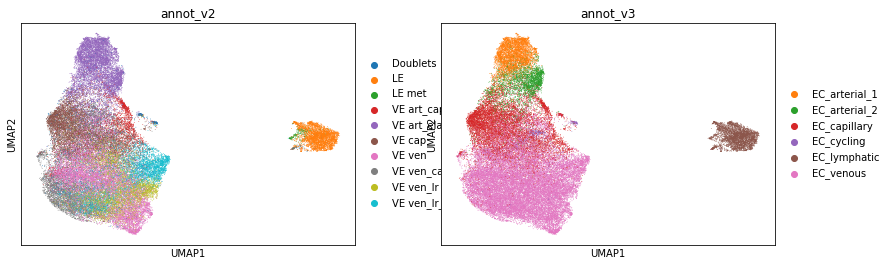

In [15]:
sc.pl.umap(endo,color=['annot_v2','annot_v3'])

In [17]:
endo.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/Endo.hvg5000_noCC.scvi_output.annotv3.nodoublets.22021208.h5ad')

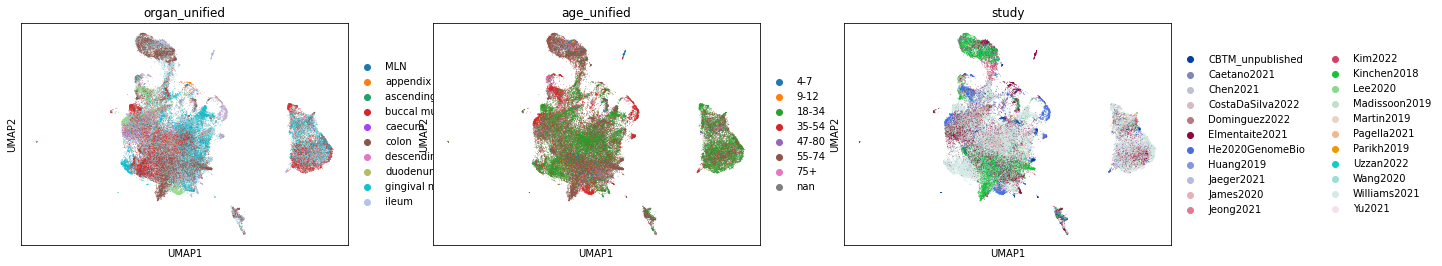

In [18]:
mes_AP = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/Mes_AP.raw.annotv3.nodoublets.22021206.h5ad')
mes_APscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/Mes_AP.hvg5000_noCC.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
mes_AP.obsm["X_scvi"] = mes_APscvi
sc.pp.neighbors(
            mes_AP,
            use_rep="X_scvi",
            n_pcs=mes_AP.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(mes_AP, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(mes_AP, color=['organ_unified', 'age_unified','study'])

In [20]:
mesap_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Mes_AP_annot_v3_new.csv',index_col=0)
mes_AP.obs['annot_v3'] = mesap_annot.annot_v3

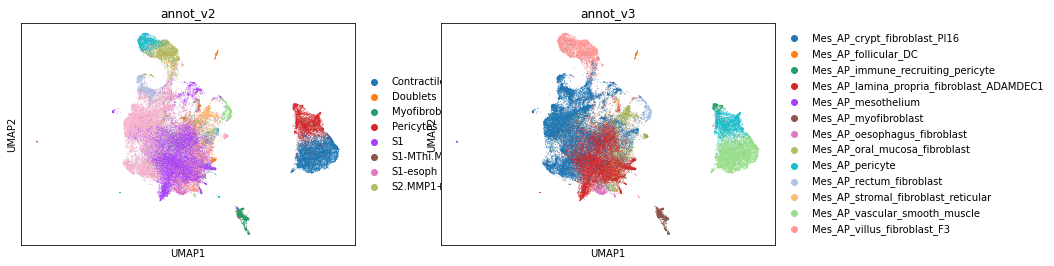

In [21]:
sc.pl.umap(mes_AP,color=['annot_v2','annot_v3'])

In [23]:
mes_AP.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/Mes_AP.hvg5000_noCC.scvi_output.annotv3.nodoublets.22021208.h5ad')

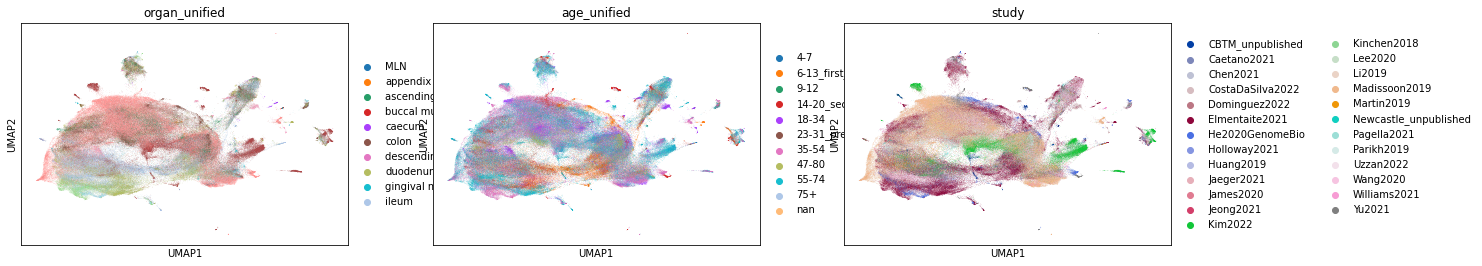

In [24]:
epi = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/Epi_all.raw.annotv3.nodoublets.20221201.h5ad')
episcvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/Epi_all.hvg5000_noRPL.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
epi.obsm["X_scvi"] = episcvi
sc.pp.neighbors(
            epi,
            use_rep="X_scvi",
            n_pcs=epi.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(epi, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(epi, color=['organ_unified', 'age_unified','study'])

In [25]:
epi_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Epi_all_annot_v3.csv',index_col=0)
epi.obs['annot_v3'] = epi_annot.annot_v3
epi.obs['annot_v3_epi'] = epi_annot.annot_v3_epi
epi.obs['annot_v3_epi_simple'] = epi_annot.annot_v3_epi_simple

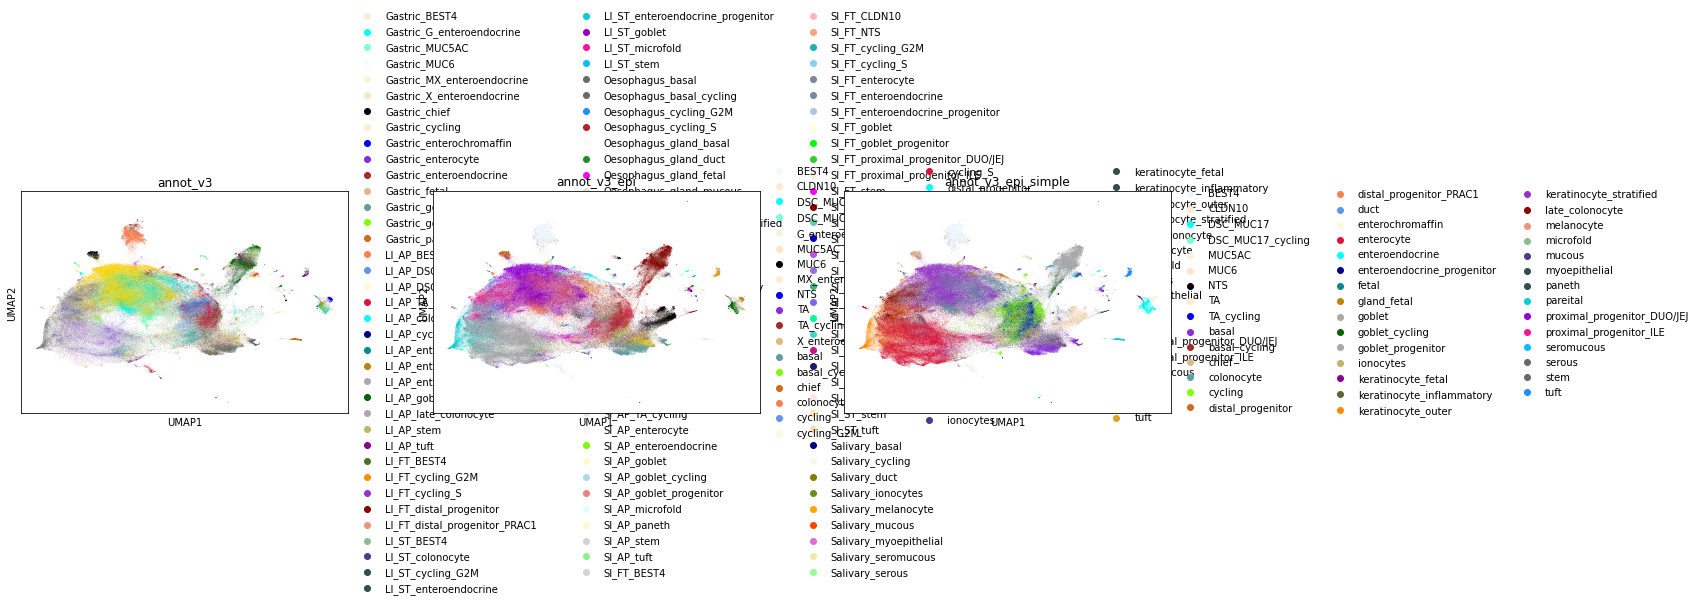

In [27]:
sc.pl.umap(epi,color=['annot_v3','annot_v3_epi','annot_v3_epi_simple'])

In [28]:
epi.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/Epi_all.hvg5000_noRPL.scvi_output.annot_v3.nodoublets.22021208.h5ad')

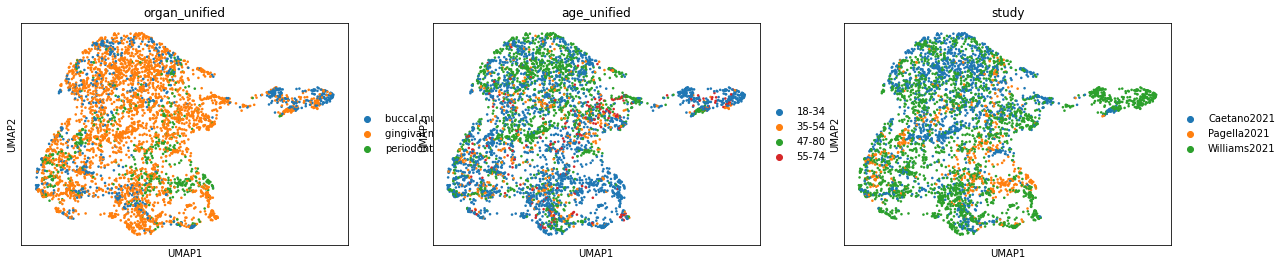

In [29]:
oral = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/Oral_epi.raw.annotv3.nodoublets.22021206.h5ad')
oralscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/Oral_epi.hvg5000_noRPL.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
oral.obsm["X_scvi"] = oralscvi
sc.pp.neighbors(
            oral,
            use_rep="X_scvi",
            n_pcs=oral.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(oral, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(oral, color=['organ_unified', 'age_unified','study'])

In [30]:
oral_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Oral_epi_annot_v3.csv',index_col=0)
oral.obs['annot_v3'] = oral_annot.annot_v3

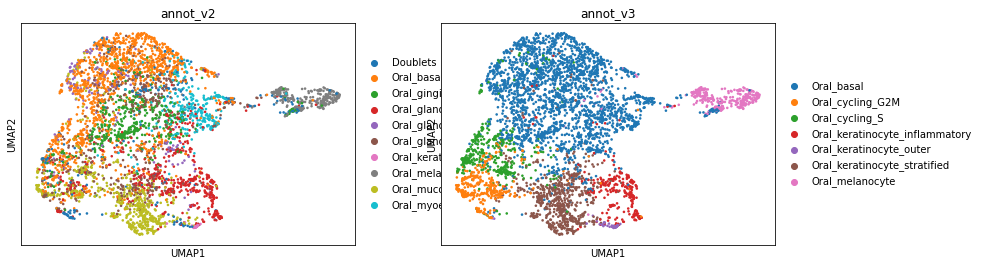

In [32]:
sc.pl.umap(oral,color=['annot_v2','annot_v3'])

In [33]:
oral.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/Oral_epi.hvg5000_noRPL.scvi_output.annotv3.nodoublets.22021208.h5ad')

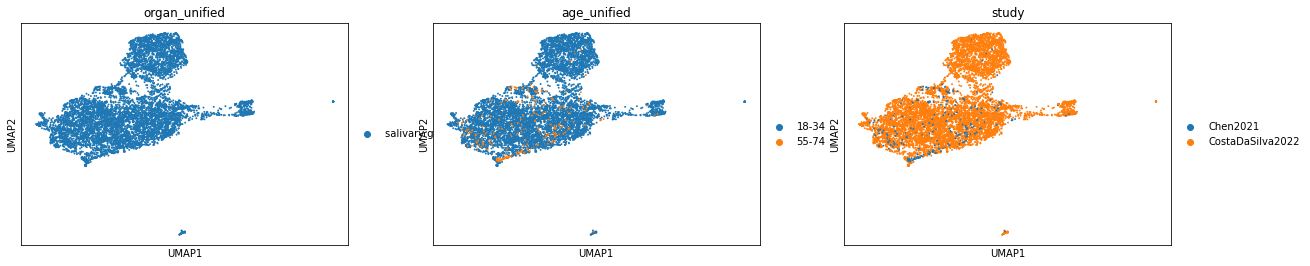

In [34]:
salivary = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/Salivary_epi.raw.annotv3.nodoublets.22021128.h5ad')
salivaryscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/Salivary_epi.hvg5000_noRPL.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
salivary.obsm["X_scvi"] = salivaryscvi
sc.pp.neighbors(
            salivary,
            use_rep="X_scvi",
            n_pcs=salivary.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(salivary, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(salivary, color=['organ_unified', 'age_unified','study'])

In [35]:
salivary_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Salivary_epi_annot_v3.csv',index_col=0)
salivary.obs['annot_v3'] = salivary_annot.annot_v3

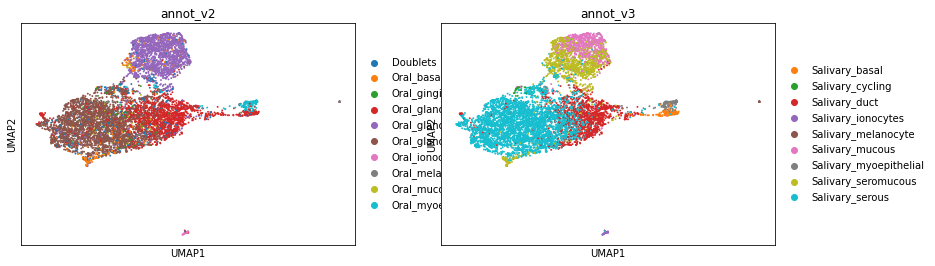

In [36]:
sc.pl.umap(salivary,color=['annot_v2','annot_v3'])

In [37]:
salivary.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/Salivary_epi.hvg5000_noRPL.scvi_output.annotv3.nodoublets.22021208.h5ad')

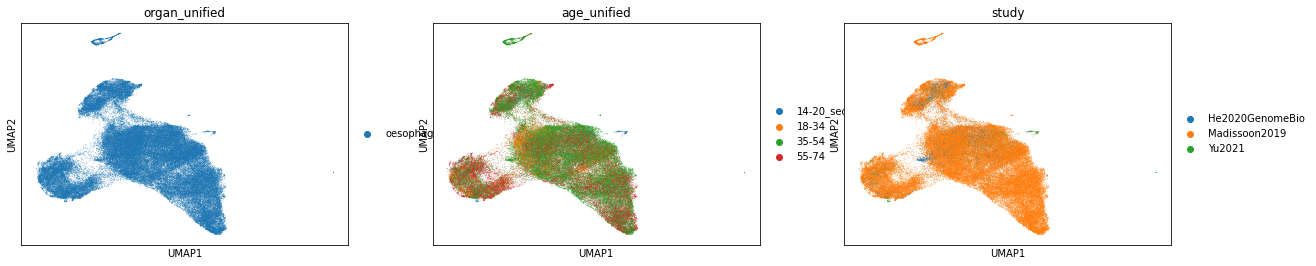

In [38]:
oes = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/Oesophagus_epi.raw.annotv3.nodoublets.22021206.h5ad')
oesscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/Oesophagus_epi.hvg5000_noRPL.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
oes.obsm["X_scvi"] = oesscvi
sc.pp.neighbors(
            oes,
            use_rep="X_scvi",
            n_pcs=oes.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(oes, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(oes, color=['organ_unified', 'age_unified','study'])

In [40]:
oes_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Oes_epi_annot_v3.csv',index_col=0)
oes.obs['annot_v3'] = oes_annot.annot_v3

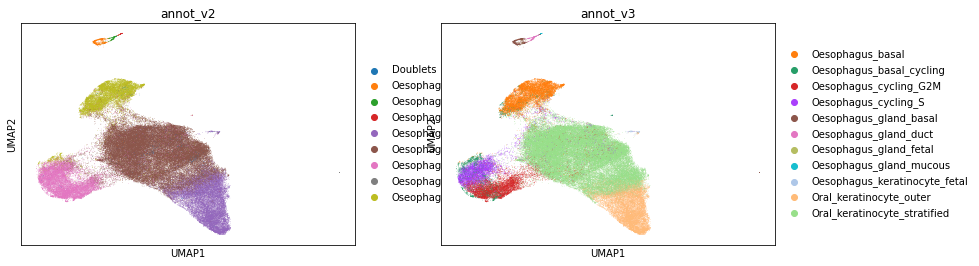

In [41]:
sc.pl.umap(oes,color=['annot_v2','annot_v3'])

In [42]:
oes.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/Oesophagus_epi.hvg5000_noRPL.scvi_output.annotv3.nodoublets.22021208.h5ad')

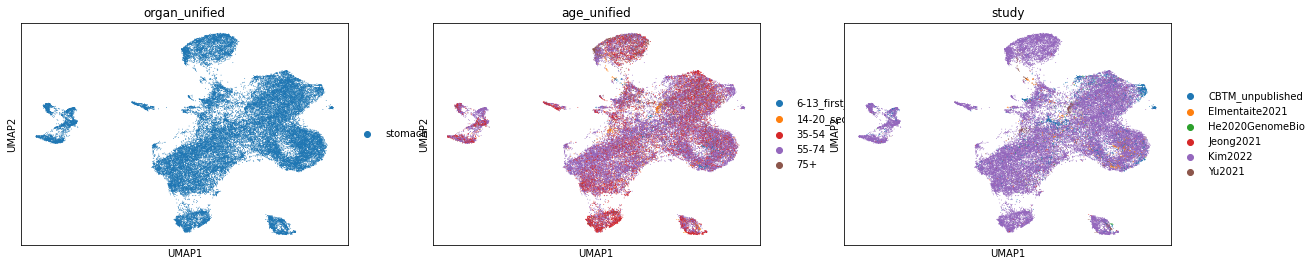

In [43]:
stomach = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/Stomach_epi.raw.annotv3.nodoublets.22021201.h5ad')
stomachscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/Stomach_epi.hvg5000_noRPL.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
stomach.obsm["X_scvi"] = stomachscvi
sc.pp.neighbors(
            stomach,
            use_rep="X_scvi",
            n_pcs=stomach.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(stomach, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(stomach, color=['organ_unified', 'age_unified','study'])

In [44]:
stomach_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Stomach_epi_annot_v3.csv',index_col=0)
stomach.obs['annot_v3'] = stomach_annot.annot_v3

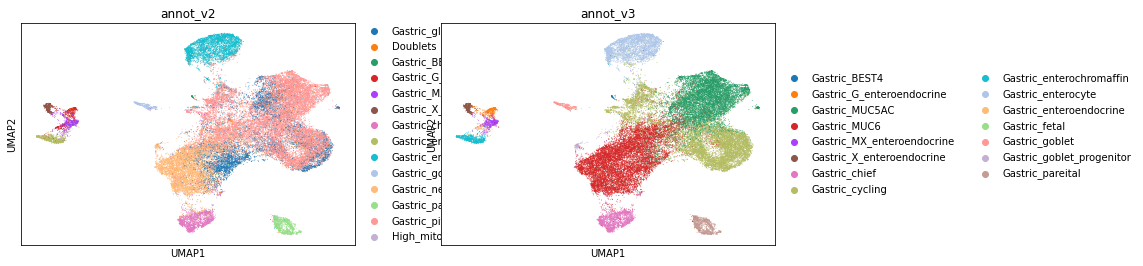

In [45]:
sc.pl.umap(stomach,color=['annot_v2','annot_v3'])

In [46]:
stomach.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/Stomach_epi.hvg5000_noRPL.scvi_output.annotv3.nodoublets.22021208.h5ad')

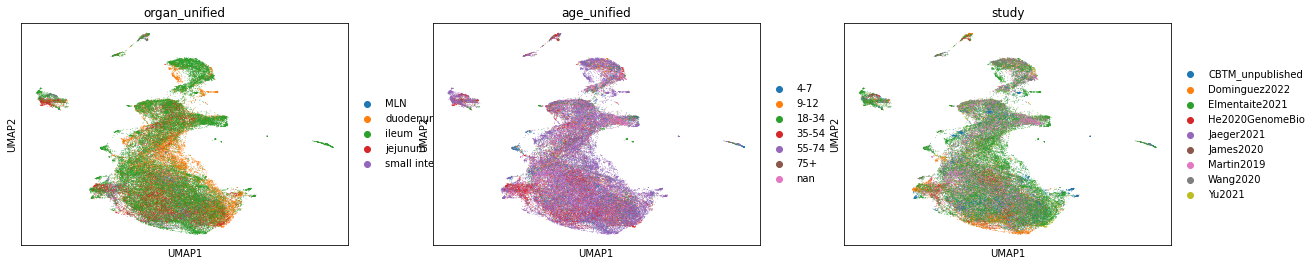

In [47]:
SI_AP = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/SI_AP_epi.raw.annotv3.nodoublets.22021206.h5ad')
SIAPscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/SI_AP_epi.hvg5000_noRPL.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
SI_AP.obsm["X_scvi"] = SIAPscvi
sc.pp.neighbors(
            SI_AP,
            use_rep="X_scvi",
            n_pcs=SI_AP.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(SI_AP, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(SI_AP, color=['organ_unified', 'age_unified','study'])

In [48]:
SI_AP_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/SI_AP_epi_annot_v3.csv',index_col=0)
SI_AP.obs['annot_v3'] = SI_AP_annot.annot_v3

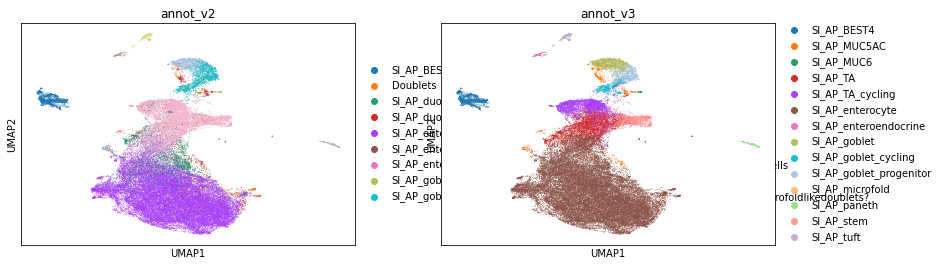

In [49]:
sc.pl.umap(SI_AP,color=['annot_v2','annot_v3'])

In [51]:
SI_AP.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/SI_AP_epi.hvg5000_noRPL.scvi_output.annotv3.nodoublets.22021208.h5ad')

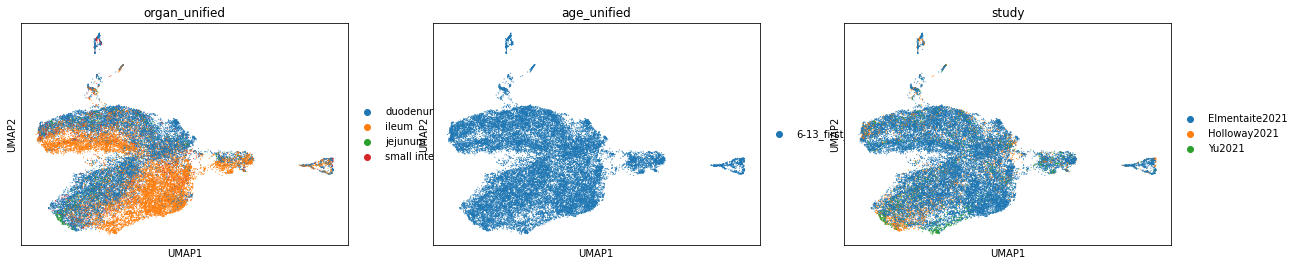

In [52]:
SI_FT = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/SI_FT_epi.raw.annotv3.nodoublets.22021206.h5ad')
SIFTscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/SI_FT_epi.hvg5000_noRPL.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
SI_FT.obsm["X_scvi"] = SIFTscvi
sc.pp.neighbors(
            SI_FT,
            use_rep="X_scvi",
            n_pcs=SI_FT.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(SI_FT, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(SI_FT, color=['organ_unified', 'age_unified','study'])

In [53]:
SI_FT_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/SI_FT_epi_annot_v3.csv',index_col=0)
SI_FT.obs['annot_v3'] = SI_FT_annot.annot_v3

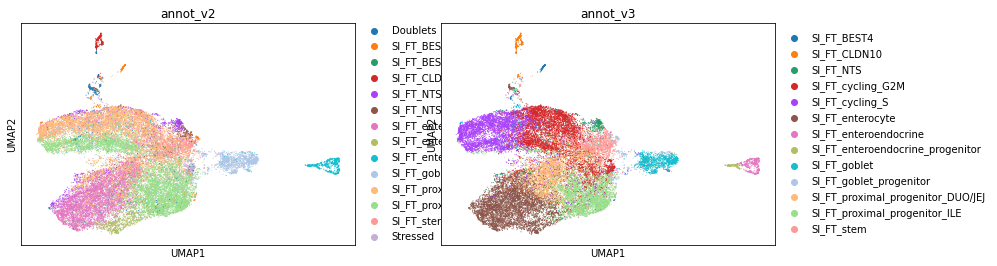

In [54]:
sc.pl.umap(SI_FT,color=['annot_v2','annot_v3'])

In [55]:
SI_FT.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/SI_FT_epi.hvg5000_noRPL.scvi_output.annotv2.nodoublets.22021208.h5ad')

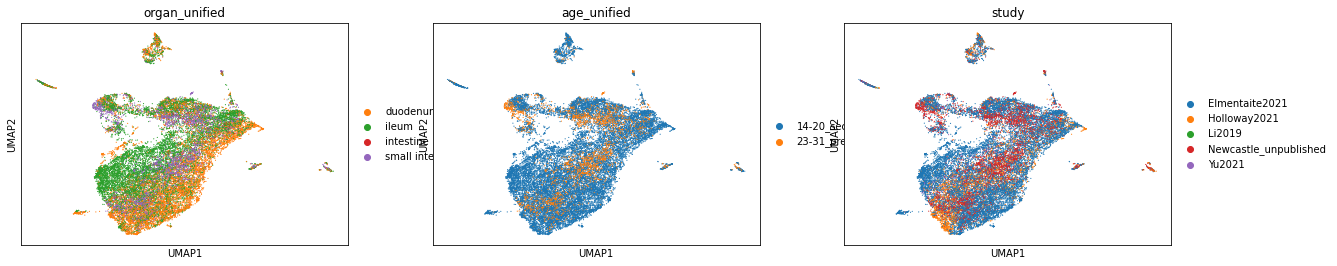

In [56]:
SI_ST = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/SI_ST_epi.raw.annotv3.nodoublets.20221206.h5ad')
SISTscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/SI_ST_epi.hvg5000_noRPL.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
SI_ST.obsm["X_scvi"] = SISTscvi
sc.pp.neighbors(
            SI_ST,
            use_rep="X_scvi",
            n_pcs=SI_ST.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(SI_ST, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(SI_ST, color=['organ_unified', 'age_unified','study'])

In [58]:
SI_ST_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/SI_ST_epi_annot_v3_draft.csv',index_col=0)
SI_ST.obs['annot_v3'] = SI_ST_annot.annot_v3

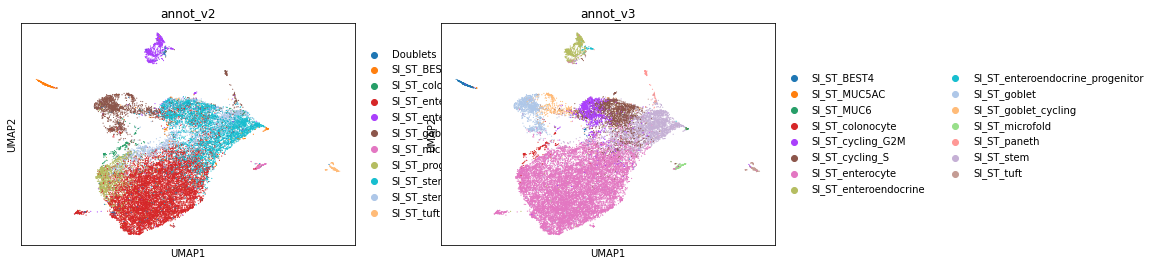

In [59]:
sc.pl.umap(SI_ST,color=['annot_v2','annot_v3'])

In [60]:
SI_ST.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/SI_ST_epi.hvg5000_noRPL.scvi_output.annotv3.nodoublets.22021208.h5ad')

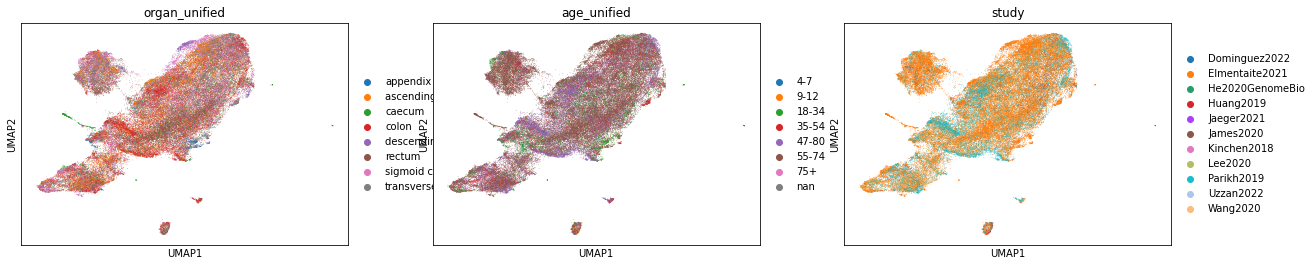

In [61]:
LI_AP = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/LI_AP_epi.raw.annotv3.nodoublets.20221206.h5ad')
LIAPscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/LI_AP_epi.hvg5000_noRPL.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
LI_AP.obsm["X_scvi"] = LIAPscvi
sc.pp.neighbors(
            LI_AP,
            use_rep="X_scvi",
            n_pcs=LI_AP.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(LI_AP, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(LI_AP, color=['organ_unified', 'age_unified','study'])

In [62]:
LI_AP

AnnData object with n_obs × n_vars = 82315 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [64]:
LI_AP_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/LI_AP_epi_annot_v3_draft.csv',index_col=0)
LI_AP.obs['annot_v3'] =LI_AP_annot.annot_v3

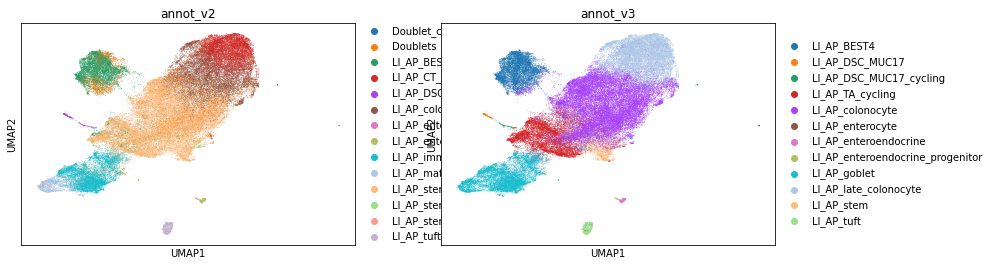

In [65]:
sc.pl.umap(LI_AP,color=['annot_v2','annot_v3'])

In [66]:
LI_AP.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/LI_AP_epi.hvg5000_noRPL.scvi_output.annotv3.nodoublets.22021208.h5ad')

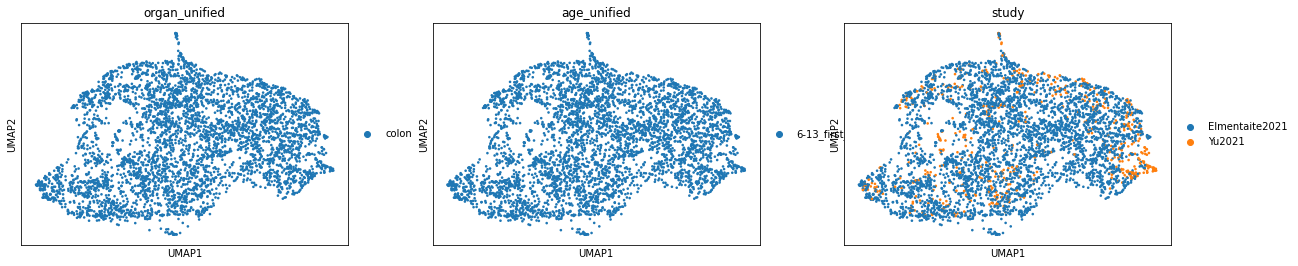

In [7]:
LI_FT = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/LI_FT_epi.raw.annotv3.nodoublets.20221201.h5ad')
LIFTscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/LI_FT_epi.hvg5000_noRPL.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
LI_FT.obsm["X_scvi"] = LIFTscvi
sc.pp.neighbors(
            LI_FT,
            use_rep="X_scvi",
            n_pcs=LI_FT.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(LI_FT, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(LI_FT, color=['organ_unified', 'age_unified','study'])

In [9]:
LI_FT_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/LI_FT_epi_annot_v3_draft.csv',index_col=0)
LI_FT.obs['annot_v3'] =LI_FT_annot.annot_v3

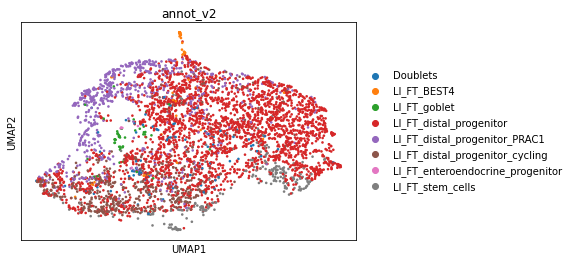

In [10]:
sc.pl.umap(LI_FT,color=['annot_v2'])

In [11]:
LI_FT.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/LI_FT_epi.hvg5000_noRPL.scvi_output.annotv2.22021208.h5ad')

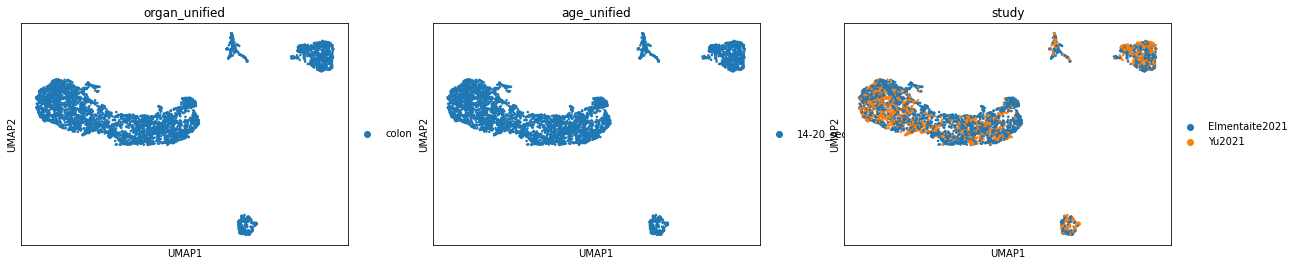

In [12]:
LI_ST = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/LI_ST_epi.raw.annotv3.nodoublets.20221206.h5ad')
LISTscvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/no_doublets_20221206/LI_ST_epi.hvg5000_noRPL.nodoublets.scvi_output.20221206.csv.gz', 
                 compression='gzip',index_col='index')
LI_ST.obsm["X_scvi"] = LISTscvi
sc.pp.neighbors(
            LI_ST,
            use_rep="X_scvi",
            n_pcs=LI_ST.obsm["X_scvi"].shape[1],
            n_neighbors=15,
            key_added="neighbors_scvi",
        )
sc.tl.umap(LI_ST, neighbors_key="neighbors_scvi", min_dist=0.1)
sc.pl.umap(LI_ST, color=['organ_unified', 'age_unified','study'])

In [13]:
LI_ST_annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/LI_ST_epi_annot_v3_draft.csv',index_col=0)
LI_ST.obs['annot_v3'] = LI_ST_annot.annot_v3

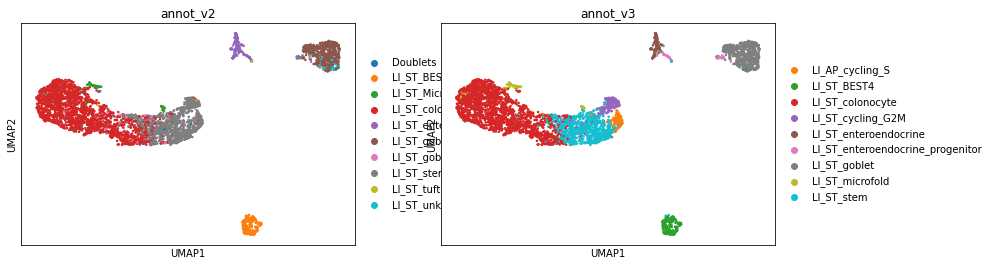

In [14]:
sc.pl.umap(LI_ST,color=['annot_v2','annot_v3'])

In [15]:
LI_ST.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/LI_ST_epi.hvg5000_noRPL.scvi_output.annotv3.22021208.h5ad')